<a href="https://colab.research.google.com/github/MPGarg/Assignment-13/blob/main/EVA8_Assigment_13_Part_2_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
#from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#!pip install -U albumentations
!pip install torch_lr_finder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [3]:
!git clone https://github.com/MPGarg/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 285 (delta 54), reused 86 (delta 42), pack-reused 178
Receiving objects: 100% (285/285), 90.82 KiB | 8.26 MiB/s, done.
Resolving deltas: 100% (135/135), done.


# VAE class is imported

In [4]:
from main_repo.models import vae
from main_repo.models.vae import cVAE

# Import Other fuctions

In [5]:
from main_repo import main, utils
from main_repo.utils import *    
from main_repo.main import *

# Assign device

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [7]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [8]:
from torchsummary import summary
view_model = cVAE((3, 32, 32), 10, nhid = 2, ncond = 16,device=device).to(device)
#summary(view_model, input_size=(1,28,28))
view_model

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

# Dataset

In [9]:
num_holes= 1
cutout_prob= 0.5
max_height = 8
max_width = 8
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform_train = transforms.Compose([transforms.Resize((32,32)),  #resises the image so it can be perfect for our model.
                                      transforms.RandomHorizontalFlip(), # FLips the image w.r.t horizontal axis
                                      transforms.RandomRotation(10),     #Rotates the image to a specified angel
                                      #transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                      #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                                      transforms.ToTensor(), # comvert the image to tensor so that it can work with torch
                                      #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #Normalize all the images
                               ])
    
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('data', train=True, download=True,
                    transform=transform_train),
    batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('data', train=False, transform=transforms.ToTensor(),download=True),
    batch_size=25)

100%|██████████| 170498071/170498071 [00:05<00:00, 28429797.62it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


# VAE

In [28]:
learning_rate = 0.001
model = cVAE((3, 32, 32), 10, nhid = 16, ncond = 16,device=device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss(reduction = "sum")

In [29]:
model_tr1, train_losses1 = fit_model_vae(
                                          model=model, 
                                          device=device,
                                          trainloader=train_loader, 
                                          criterion = criterion,
                                          EPOCHS=50,
                                          optimizer=optimizer,
                                          scheduler=None                                                
                                            )


EPOCH: 1 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.11it/s]



Average Training Loss=1959.91042

EPOCH: 2 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.31it/s]



Average Training Loss=1919.357261875

EPOCH: 3 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.99it/s]



Average Training Loss=1911.374669375

EPOCH: 4 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.41it/s]



Average Training Loss=1884.895825

EPOCH: 5 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.64it/s]



Average Training Loss=1863.2126390625

EPOCH: 6 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.19it/s]



Average Training Loss=1849.7671696875

EPOCH: 7 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.42it/s]



Average Training Loss=1845.466969375

EPOCH: 8 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.88it/s]



Average Training Loss=1841.5460415625

EPOCH: 9 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.56it/s]



Average Training Loss=1839.791703125

EPOCH: 10 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.95it/s]



Average Training Loss=1837.24036875

EPOCH: 11 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.06it/s]



Average Training Loss=1835.0701096875

EPOCH: 12 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.29it/s]



Average Training Loss=1829.606301875

EPOCH: 13 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.78it/s]



Average Training Loss=1825.345289375

EPOCH: 14 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.44it/s]



Average Training Loss=1819.89247875

EPOCH: 15 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.85it/s]



Average Training Loss=1816.742636875

EPOCH: 16 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.25it/s]



Average Training Loss=1815.5204109375

EPOCH: 17 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.11it/s]



Average Training Loss=1814.51835375

EPOCH: 18 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.77it/s]



Average Training Loss=1813.787554375

EPOCH: 19 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.37it/s]



Average Training Loss=1813.0867496875

EPOCH: 20 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.76it/s]



Average Training Loss=1812.4283728125

EPOCH: 21 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.17it/s]



Average Training Loss=1811.157388125

EPOCH: 22 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.27it/s]



Average Training Loss=1808.2158596875

EPOCH: 23 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.75it/s]



Average Training Loss=1806.41814625

EPOCH: 24 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.58it/s]



Average Training Loss=1804.5247309375

EPOCH: 25 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.72it/s]



Average Training Loss=1804.7398615625

EPOCH: 26 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.08it/s]



Average Training Loss=1803.9336875

EPOCH: 27 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.30it/s]



Average Training Loss=1803.2214675

EPOCH: 28 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.98it/s]



Average Training Loss=1802.548035

EPOCH: 29 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.55it/s]



Average Training Loss=1801.8633965625

EPOCH: 30 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.90it/s]



Average Training Loss=1801.7109590625

EPOCH: 31 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.24it/s]



Average Training Loss=1801.88556

EPOCH: 32 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.21it/s]



Average Training Loss=1801.566379375

EPOCH: 33 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.01it/s]



Average Training Loss=1800.9582115625

EPOCH: 34 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.64it/s]



Average Training Loss=1800.515380625

EPOCH: 35 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.89it/s]



Average Training Loss=1800.6067

EPOCH: 36 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.06it/s]



Average Training Loss=1800.5668525

EPOCH: 37 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.25it/s]



Average Training Loss=1799.7518375

EPOCH: 38 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.76it/s]



Average Training Loss=1800.0017725

EPOCH: 39 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.06it/s]



Average Training Loss=1799.6129621875

EPOCH: 40 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.71it/s]



Average Training Loss=1798.9904121875

EPOCH: 41 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.24it/s]



Average Training Loss=1799.138185

EPOCH: 42 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.25it/s]



Average Training Loss=1798.849703125

EPOCH: 43 (LR: 0.001)


100%|██████████| 391/391 [00:21<00:00, 17.78it/s]



Average Training Loss=1798.7433559375

EPOCH: 44 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.40it/s]



Average Training Loss=1798.327879375

EPOCH: 45 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.99it/s]



Average Training Loss=1798.4558778125

EPOCH: 46 (LR: 0.001)


100%|██████████| 391/391 [00:20<00:00, 19.44it/s]



Average Training Loss=1798.474555625

EPOCH: 47 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.90it/s]



Average Training Loss=1797.7637978125

EPOCH: 48 (LR: 0.001)


100%|██████████| 391/391 [00:20<00:00, 19.53it/s]



Average Training Loss=1797.85192875

EPOCH: 49 (LR: 0.001)


100%|██████████| 391/391 [00:24<00:00, 16.03it/s]



Average Training Loss=1797.6790115625

EPOCH: 50 (LR: 0.001)


100%|██████████| 391/391 [00:20<00:00, 19.42it/s]


Average Training Loss=1796.9221940625


# Generate Image

In [30]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
number = 1
with torch.no_grad():
    x = model.generate(number)

In [31]:
from matplotlib import pyplot as plt
from matplotlib import cm

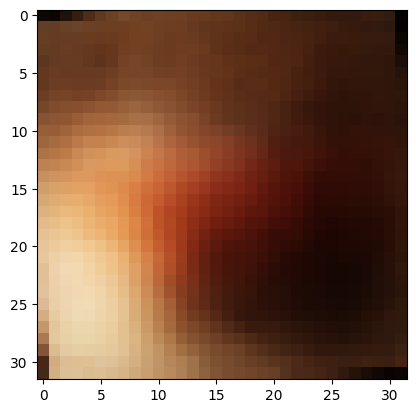

In [32]:
plt.imshow(np.transpose(x.squeeze(0).cpu().numpy(), (1, 2, 0)))

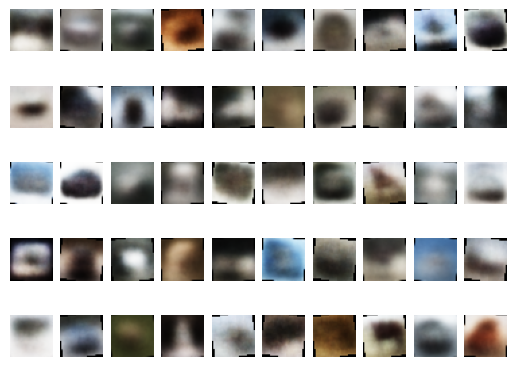

In [33]:
with torch.no_grad():
    x = model.generate(torch.tensor([list(range(10))] * 5).clone().view(-1))
    
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(np.transpose(x[i].squeeze(0).cpu().numpy(), (1, 2, 0)))

# Incorrect Labels

In [34]:
dataiter = iter(train_loader)
data_next = next(dataiter)
images, labels = data_next

In [35]:
labels_1 = []
for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    labels_1.append(incorrect_label)

In [36]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
labels = labels.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels)

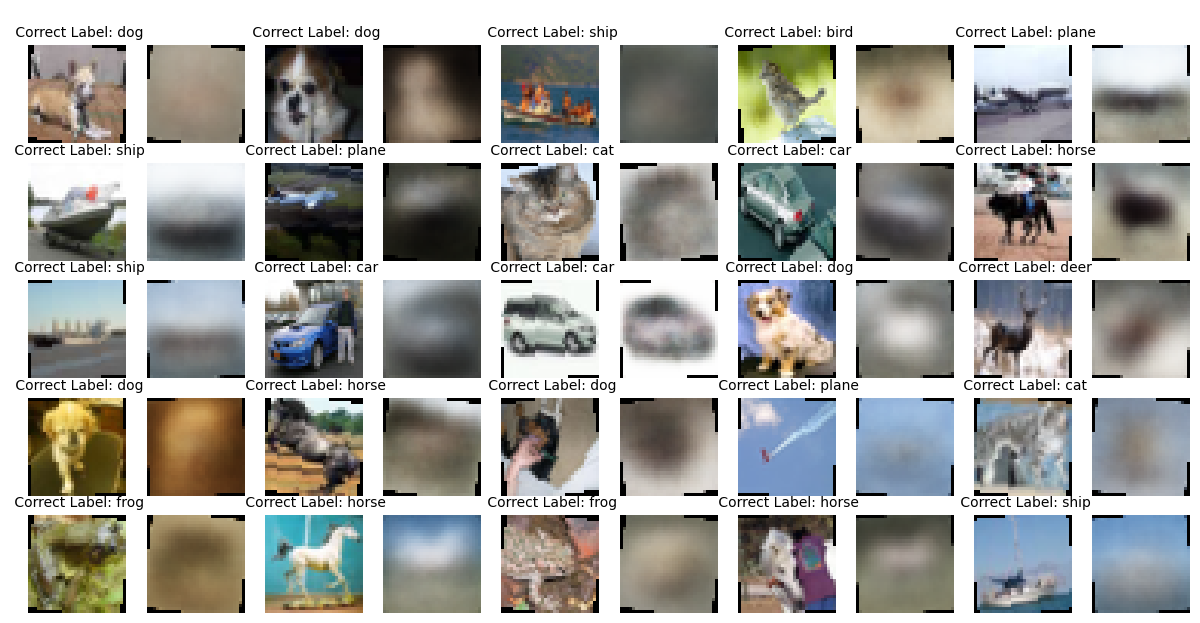

In [37]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))   
    ax.set_title(f'\n Correct Label: {classes[lbl_new.detach()]}',fontsize=10)  
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0)))  

In [38]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
labels = labels.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels_c)

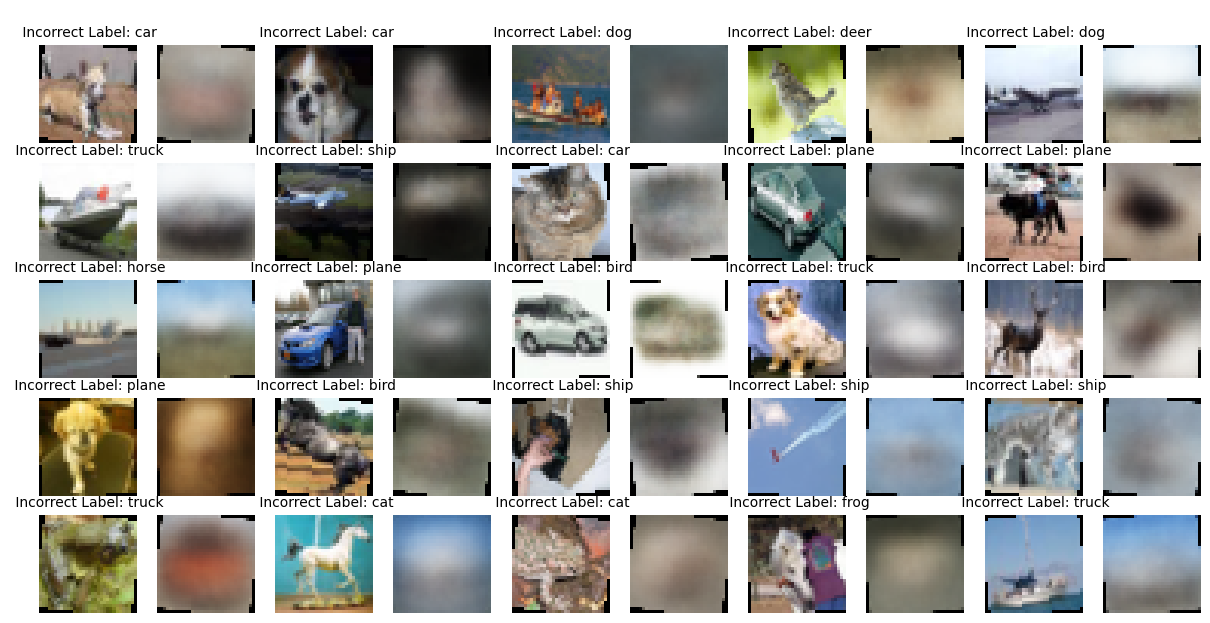

In [39]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels_c[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))   
    ax.set_title(f'\n Incorrect Label: {classes[lbl_new.detach()]}',fontsize=10)  
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0))) 